created 7-18-24

# <mark style="background-color: #edacb1"> <font color ='193551'>Plan View of Drifters & $Particle\_Depth_{\varphi_{y-n}}(\varphi_y,Region)$</font></mark>

# <mark style="background-color: #ced78d"> <font color ='5c8180'>Table of Contents</font></mark>
1. **[Background](#1)**
2. **[Plan view of drifters](#2)**\
    a. [Based on starting depth](#2a)\
    b. [Based on Region](#2b)
3. **[Individual particle regions based on latitude](#3)**
4. **[Previoius depths of particles based on latitude and region](#4)**

# <mark style="background-color: #e7cfe8"> <font color ='5c8180'>1. Background </font></mark>
<a name=1></a>

## <font color='5c8180'> Purpose.</font>
This notebook contains plan view drifter visualization figures and a depth-longitude view for drifter depths based on their crossing locations for latitudes farther north. We use data from 3 simulations, differentiated based on their background diapycnal diffusivity (`KD = 0, 5E-6, 1E-5` m/s).

## <font color='5c8180'> Drifter Datasets.</font>
Drifter datasets are created in the following notebooks. See these notebooks for more information on how drifters were chosen. 

|KD value | Notebook|
|:--------- |:-------- |
|5E-6 | [7-5_60yr_make_full_traj_20N_SB](./7-5_60yr_make_full_traj_20N_SB.ipynb)|
|1E-5 | [7-5_60yr_make_full_traj_20N_KD1E-5](./7-5_60yr_make_full_traj_20N_KD1E-5.ipynb)|
|0    | [7-10_60yr_make_full_traj_20N_KD0](./7-10_60yr_make_full_traj_20N_KD0.ipynb)|


## <font color='5c8180'> Section Overview.</font>
[$\S2.$](#2) provides plan views of drifters based on their crossing latitude and region or initial depth (commented out). KD and latitude Booleans must be set prior to running.   

[$\S3.$](#3) follows how the regions at which particles cross latitudes can change as they move north. KD Booleans must be set prior to running.

[$\S4.$](#4) expands on $\S3.$ by allowing us to visiualize particle depths before they cross at a latitude farther north in a specific region. KD, north region, north latitude, and previous south latitude Booleans must be set prior to running.

For all sections, datasets can be further modified to only include particles that are assigned `Sv` values by using the `elim_Sv_NaN` Boolean. 

## <font color='5c8180'> Regions.</font>
Regions for depth-longitude figures are defined as follows with the goal of differentiating which particles move north through the Western Boundary Current (WBC) (Region 1- shallow & Region 2- deep water) and interior ocean (Region 3 - shallow & Region 4 - deep water).

In [3]:
import xarray as xr
from xgcm import Grid
import numpy as np
import warnings
from matplotlib import pyplot as plt
import matplotlib.ticker as tick
import cmocean.cm as cmo
import cmocean
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize']=(8,5)

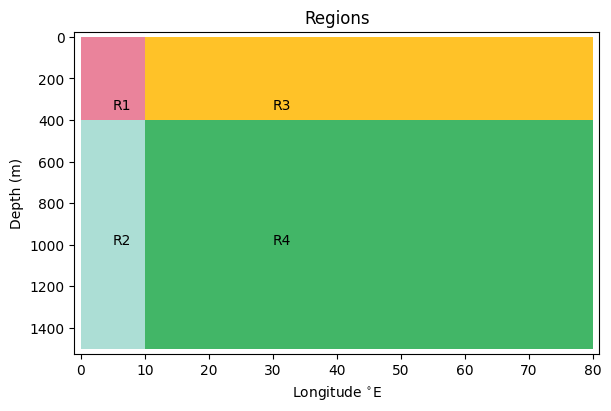

In [9]:
from matplotlib.patches import Rectangle
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True,figsize=(6,4))
plt.plot(np.zeros(1))

ax.text(5,350,'R1',color='black')
ax.text(5,1000,'R2',color='black')
ax.text(30,350,'R3',color='black')
ax.text(30,1000,'R4',color='black')  


ax.invert_yaxis()
ax.set_title('Regions')
ax.set_ylabel('Depth (m)')
ax.set_xlabel('Longitude $^{\circ}$E')

ax.add_patch(Rectangle((0,0), 10, 400,facecolor='#EA839B'))
ax.add_patch(Rectangle((0,400),10,1100,facecolor='#ACDED5'))
ax.add_patch(Rectangle((10,0),70,400,facecolor='#FFC228'))
ax.add_patch(Rectangle((10,400),70,1100,facecolor='#42B667'))
ax.set_xlim(-1,81)
ax.set_ylim(-25,1525)

ax.invert_yaxis()

# <mark style="background-color: #e7cfe8"> <font color ='193551'> 2. Plan View of Drifters</font></mark>
<a name=2></a>

## <font color ='193551'> Get the drifter numbers of the particles that reach 20$^{\circ}$N.</font>

In [10]:
filepath = '/vortex1/jupyter-kuyeda/Drifters/7-17_reach20N_above1000m_mintime_cross_lats/'
# KD5E-6
sb = xr.open_dataset(filepath+'7-23_TD_SB_reach20N_above1000m_mintime_ds_10S_SB.nc')

# KD1E-5
kd = xr.open_dataset(filepath+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_10S_KD1E-5.nc')

# KD0
kd0 = xr.open_dataset(filepath+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_10S_KD0.nc')

In [11]:
sb_i_reach = sb.i.values
kd_i_reach = kd.i.values
kd0_i_reach = kd0.i.values

## <font color ='193551'>Open all drifter pathways.</font>

In [12]:
above1000m_sb = xr.open_dataset(filepath+'7-23_TD_SB_above1000m_sb.nc')
above1000m_kd = xr.open_dataset(filepath+'7-23_TD_KD1E-5_above1000m_KD1E-5.nc')
above1000m_kd0 = xr.open_dataset(filepath+'7-23_TD_KD0_above1000m_KD0.nc')

## <font color ='193551'>Get pathways of drifters that reach 20$^{\circ}$N..</font>

In [13]:
sb_paths = above1000m_sb.where(above1000m_sb.drifter_num.isin(sb_i_reach)).dropna('i',how='all')
kd_paths = above1000m_kd.where(above1000m_kd.drifter_num.isin(kd_i_reach)).dropna('i',how='all')
kd0_paths = above1000m_kd0.where(above1000m_kd0.drifter_num.isin(kd0_i_reach)).dropna('i',how='all')

## <font color ='193551'>2a. Plan view of drifters based on starting depth.</font>
<a name =2a></a>

In [36]:
'''
init_sb = sb_paths.isel(time=0)
surface_sb_i = init_sb.where(init_sb.depth<50).dropna('i',how='all')
surface_sb_paths = sb_paths.where(sb_paths.drifter_num.isin(surface_sb_i.i)).dropna('i',how='all')
###
start50to100 = init_sb.where((init_sb.depth>=50) & (init_sb.depth<100)).dropna('i',how='all')
start50to100paths = sb_paths.where(sb_paths.drifter_num.isin(start50to100.i)).dropna('i',how='all')
###
start100to400 = init_sb.where((init_sb.depth>=100) & (init_sb.depth<400)).dropna('i',how='all')
start100to400paths = sb_paths.where(sb_paths.drifter_num.isin(start100to400.i)).dropna('i',how='all')
###
startbelow400 = init_sb.where(init_sb.depth>=400).dropna('i',how='all')
startbelow400paths = sb_paths.where(sb_paths.drifter_num.isin(startbelow400.i)).dropna('i',how='all')
'''

"\ninit_sb = sb_paths.isel(time=0)\nsurface_sb_i = init_sb.where(init_sb.depth<50).dropna('i',how='all')\nsurface_sb_paths = sb_paths.where(sb_paths.drifter_num.isin(surface_sb_i.i)).dropna('i',how='all')\n###\nstart50to100 = init_sb.where((init_sb.depth>=50) & (init_sb.depth<100)).dropna('i',how='all')\nstart50to100paths = sb_paths.where(sb_paths.drifter_num.isin(start50to100.i)).dropna('i',how='all')\n###\nstart100to400 = init_sb.where((init_sb.depth>=100) & (init_sb.depth<400)).dropna('i',how='all')\nstart100to400paths = sb_paths.where(sb_paths.drifter_num.isin(start100to400.i)).dropna('i',how='all')\n###\nstartbelow400 = init_sb.where(init_sb.depth>=400).dropna('i',how='all')\nstartbelow400paths = sb_paths.where(sb_paths.drifter_num.isin(startbelow400.i)).dropna('i',how='all')\n"

In [37]:
'''
fig,ax = plt.subplots(nrows=1,ncols=4,constrained_layout=True)
starting_depths = [surface_sb_paths,start50to100paths, start100to400paths,startbelow400paths]
starting_depths_titles = ['0-50m','50-100m','100-400m','400m<']
for i in range(0,4):
    m = starting_depths[i].plot.scatter(x='lon',y='lat',edgecolor='none',marker='.',hue='depth',
                                    vmin=0,vmax=1300,ax=ax[i],add_colorbar=False)
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[i].set_ylim(-70,70)
    ax[i].set_xlim(0,80)
    ax[i].set_aspect(140/80)
    ax[i].set_title(starting_depths_titles[i])
    
ax[0].set_ylabel('Latitude $^{\circ}$N')
fig.colorbar(m,ax=ax,label='Depth (m)',shrink=0.8)
fig.suptitle('KD=5E-6 Particles Based on Starting Depth')
'''

"\nfig,ax = plt.subplots(nrows=1,ncols=4,constrained_layout=True)\nstarting_depths = [surface_sb_paths,start50to100paths, start100to400paths,startbelow400paths]\nstarting_depths_titles = ['0-50m','50-100m','100-400m','400m<']\nfor i in range(0,4):\n    m = starting_depths[i].plot.scatter(x='lon',y='lat',edgecolor='none',marker='.',hue='depth',\n                                    vmin=0,vmax=1300,ax=ax[i],add_colorbar=False)\n    ax[i].set_ylabel('')\n    ax[i].set_xlabel('Longitude ($^{\\circ}$E)')\n    ax[i].set_ylim(-70,70)\n    ax[i].set_xlim(0,80)\n    ax[i].set_aspect(140/80)\n    ax[i].set_title(starting_depths_titles[i])\n    \nax[0].set_ylabel('Latitude $^{\\circ}$N')\nfig.colorbar(m,ax=ax,label='Depth (m)',shrink=0.8)\nfig.suptitle('KD=5E-6 Particles Based on Starting Depth')\n"

## <font color ='193551'>2b. Plan view of drifters based on region it crosses lattiude.</font>
<a name=2b></a>

In [16]:
file_path = '/vortex1/jupyter-kuyeda/Drifters/7-17_reach20N_above1000m_mintime_cross_lats/'

In [17]:
KD0= True
KDsb = False
KD1Eminus5 = False

In [18]:
mintime_ds_10S = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_10S_SB.nc')
mintime_ds_0N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_0N_SB.nc')
mintime_ds_5N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_5N_SB.nc')
mintime_ds_10N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_10N_SB.nc')
mintime_ds_20N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_20N_SB.nc')
# mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_10N,mintime_ds_20N]
mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_20N]

mintime_ds_10S_kd = xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_10S_KD1E-5.nc')
mintime_ds_0N_kd= xr.open_dataset(file_path+'/7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_0N_KD1E-5.nc')
mintime_ds_5N_kd= xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_5N_KD1E-5.nc')
mintime_ds_10N_kd = xr.open_dataset(file_path+'/7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_10N_KD1E-5.nc')
mintime_ds_20N_kd = xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_20N_KD1E-5.nc')
# mintime_ds_kd_array = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_10N_kd,mintime_ds_20N_kd]
mintime_ds_kd_array = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_20N_kd]

mintime_ds_10S_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_10S_KD0.nc')
mintime_ds_0N_kd0= xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_0N_KD0.nc')
mintime_ds_5N_kd0= xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_5N_KD0.nc')
mintime_ds_10N_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_10N_KD0.nc')
mintime_ds_20N_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_20N_KD0.nc')
# mintime_ds_kd0_array = [mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_10N_kd0,mintime_ds_20N_kd0]
mintime_ds_kd0_array = [mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_20N_kd0]

In [19]:
elim_Sv_NaN = True
if elim_Sv_NaN==True:
    msb = mintime_ds_10S.Sv
    mkd = mintime_ds_10S_kd.Sv
    m0 = mintime_ds_10S_kd0.Sv

    # get drifter numbers of where there are nans for Sv
    msbnan = msb[np.isnan(msb)]
    mkdnan = mkd[np.isnan(mkd)]
    m0nan = m0[np.isnan(m0)]


    # drifters with Sv nan values in at least one of the above datasets 
    sbUkd = np.union1d(msbnan.i.values,mkdnan.i.values)
    sbUkdU0 = np.union1d(sbUkd, m0nan.i.values)
    sbUkdU0

    # format to eliminate drifters that don't have Sv values
    for i in range(0,4):
        mintime_ds_array[i] = mintime_ds_array[i].where(~np.isin(mintime_ds_array[i].i,sbUkdU0)).dropna('i')
        mintime_ds_kd_array[i] = mintime_ds_kd_array[i].where(~np.isin(mintime_ds_kd_array[i].i,sbUkdU0)).dropna('i')
        mintime_ds_kd0_array[i] = mintime_ds_kd0_array[i].where(~np.isin(mintime_ds_kd0_array[i].i,sbUkdU0)).dropna('i')

In [20]:
if KD0 == True:
    mintime_ds_array = mintime_ds_kd0_array
    sb_paths = kd0_paths
if KDsb == True:
    mintime_ds_array = mintime_ds_array
    sb_paths = sb_paths
if KD1Eminus5 ==True:
    mintime_ds_array = mintime_ds_kd_array
    sb_paths = kd_paths

In [21]:
crossing_lat = 0
# crossing_lat = 0 # -10N
# crossing_lat = 1 # 0N
# crossing_lat = 2 # 5N
# crossing_lat = 3 # 20N

k = crossing_lat


if k==0:
    lat_str = '-10'
elif k==1:
    lat_str = '0'
elif k==2:
    lat_str = '5'
elif k==3:
    lat_str = '20'
    
region1 = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded <= 10) & (mintime_ds_array[k].depth_gridded < 400)).dropna('i',how='all')
region2 = mintime_ds_array[k].where((mintime_ds_array[k].depth_gridded >= 400) & (mintime_ds_array[k].lon_gridded <=10)).dropna('i',how='all')
region3 = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded > 10) & (mintime_ds_array[k].depth_gridded < 400)).dropna('i',how='all')
region4 = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded > 10) & (mintime_ds_array[k].depth_gridded > 400)).dropna('i',how='all')

In [22]:
# get paths for each region for KD=5E-6
region1_paths = sb_paths.where(sb_paths.drifter_num.isin(region1.i)).dropna('i',how='all')
region2_paths = sb_paths.where(sb_paths.drifter_num.isin(region2.i)).dropna('i',how='all')
region3_paths = sb_paths.where(sb_paths.drifter_num.isin(region3.i)).dropna('i',how='all')
region4_paths = sb_paths.where(sb_paths.drifter_num.isin(region4.i)).dropna('i',how='all')

## <font color ='193551'>Depth Colorbar.</font>

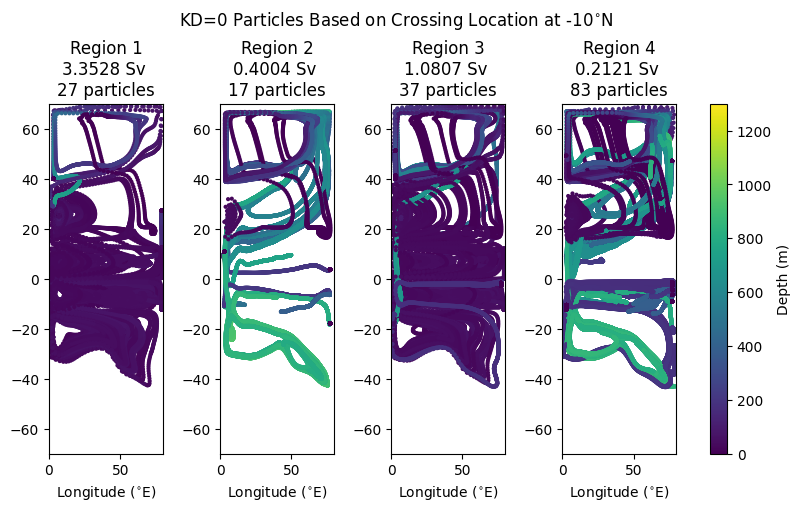

In [23]:
# Depth
sb_regions = [region1_paths,region2_paths,region3_paths,region4_paths]
region_titles = ['Region 1','Region 2','Region 3','Region 4']
fig,ax=plt.subplots(nrows=1,ncols=4,constrained_layout=True)

# data_present= (0,1,2,3)

if k ==2 and KDsb ==True:
    data_present = (1,2,3)
    
elif k ==1 and KD0 ==True:
    data_present= (0,1,2)
    
elif k ==2 and KD0 ==True:
    data_present= (1,2,3)
    
elif k ==3 and KD0 ==True:
    data_present= (0,2,3)
elif k==0 and KD1Eminus5==True:
    data_present= (0,1,2)
elif k==2 and KD1Eminus5==True:
    data_present=(1,2)
elif k==3 and KD1Eminus5==True:
    data_present=(0,1,2)

else:
    data_present = (0,1,2,3)
    
for i in data_present:
    m=sb_regions[i].plot.scatter(x='lon',y='lat',edgecolor='none',hue='depth',vmin=0,vmax=1300,marker='.',ax=ax[i],
                              add_colorbar=False)
    ax[i].set_title(region_titles[i] + '\n' + str(np.round(sb_regions[i].isel(time=0).Sv.sum().values,decimals=4)) +
                   ' Sv \n' + str(int(len(sb_regions[i].i))) + ' particles')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[i].set_aspect(140/80)
    ax[i].set_ylim(-70,70)
    ax[i].set_xlim(0,80)
    
    
fig.colorbar(m,ax=ax,label='Depth (m)')

if KDsb ==True:
    fig.suptitle('KD=5E-6 Particles Based on Crossing Location at ' + lat_str + '$^{\circ}$N')
if KD0 == True:
    fig.suptitle('KD=0 Particles Based on Crossing Location at ' + lat_str + '$^{\circ}$N')
if KD1Eminus5 ==True:
    fig.suptitle('KD=1E-5 Particles Based on Crossing Location at ' + lat_str + '$^{\circ}$N')

## <font color ='193551'>Temperature Colorbar.</font>

In [38]:
# Temperature
'''
sb_regions = [region1_paths,region2_paths,region3_paths,region4_paths]
region_titles = ['Region 1','Region 2','Region 3','Region 4']
fig,ax=plt.subplots(nrows=1,ncols=4,constrained_layout=True)


if k ==2 and KDsb ==True:
    data_present = (1,2,3)
    
elif k ==1 and KD0 ==True:
    data_present= (0,1,2)
    
elif k ==2 and KD0 ==True:
    data_present= (1,2,3)
    
elif k ==3 and KD0 ==True:
    data_present= (0,2,3)
elif k==0 and KD1Eminus5==True:
    data_present= (0,1,2)
elif k==2 and KD1Eminus5==True:
    data_present=(1,2)
elif k==3 and KD1Eminus5==True:
    data_present=(0,1,2)

else:
    data_present = (0,1,2,3)
    
for i in data_present:
    m=sb_regions[i].plot.scatter(x='lon',y='lat',edgecolor='none',hue='theta',cmap='plasma',marker='.',
                                 vmin=0,vmax=26,ax=ax[i],
                              add_colorbar=False)
    ax[i].set_title(region_titles[i] + '\n' + str(np.round(sb_regions[i].isel(time=0).Sv.sum().values,decimals=4)) +
                   ' Sv \n' + str(int(len(sb_regions[i].i))) + ' particles')
    ax[i].set_ylabel('')
    ax[i].set_xlabel('Longitude ($^{\circ}$E)')
    ax[i].set_aspect(140/80)
    ax[i].set_ylim(-70,70)
    ax[i].set_xlim(0,80)
    
    
fig.colorbar(m,ax=ax,label='Temperature ($^{\circ}$C)')
fig.suptitle('KD=5E-6 Particles Based on Crossing Location at ' + lat_str + '$^{\circ}$N')
'''

"\nsb_regions = [region1_paths,region2_paths,region3_paths,region4_paths]\nregion_titles = ['Region 1','Region 2','Region 3','Region 4']\nfig,ax=plt.subplots(nrows=1,ncols=4,constrained_layout=True)\n\n\nif k ==2 and KDsb ==True:\n    data_present = (1,2,3)\n    \nelif k ==1 and KD0 ==True:\n    data_present= (0,1,2)\n    \nelif k ==2 and KD0 ==True:\n    data_present= (1,2,3)\n    \nelif k ==3 and KD0 ==True:\n    data_present= (0,2,3)\nelif k==0 and KD1Eminus5==True:\n    data_present= (0,1,2)\nelif k==2 and KD1Eminus5==True:\n    data_present=(1,2)\nelif k==3 and KD1Eminus5==True:\n    data_present=(0,1,2)\n\nelse:\n    data_present = (0,1,2,3)\n    \nfor i in data_present:\n    m=sb_regions[i].plot.scatter(x='lon',y='lat',edgecolor='none',hue='theta',cmap='plasma',marker='.',\n                                 vmin=0,vmax=26,ax=ax[i],\n                              add_colorbar=False)\n    ax[i].set_title(region_titles[i] + '\n' + str(np.round(sb_regions[i].isel(time=0).Sv.sum().val

#  <mark style="background-color: #5c8180"> <font color ='ced78d'> 3. Individual particle regions at each latitude.</font></mark>
<a name=3></a>

In [25]:
KD0= False
KDsb = False
KD1Eminus5 = True

if KD0 == True:
    mintime_array =[mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_20N_kd0]
    paths = xr.open_dataset(filepath+'7-23_TD_KD0_above1000m_KD0.nc')
    # sb_paths = kd0_paths
    # sb= above1000m_kd0.where(above1000m_kd0.drifter_num.isin(kd0_i_reach)).dropna('i',how='all')
if KDsb == True:
    mintime_array = mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_20N]
    paths = xr.open_dataset(filepath+'7-23_TD_SB_above1000m_sb.nc')
    # sb=  above1000m_sb.where(above1000m_sb.drifter_num.isin(sb_i_reach)).dropna('i',how='all')
if KD1Eminus5 ==True:
    mintime_array = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_20N_kd]
    paths = xr.open_dataset(filepath+'7-23_TD_KD1E-5_above1000m_KD1E-5.nc')
    # sb_paths = above1000m_kd.where(above1000m_kd.drifter_num.isin(kd_i_reach)).dropna('i',how='all')
    # sb = sb_paths

In [26]:
# make region arrays where [i] is the latitude
region1_dns = [[],[],[],[]]
region2_dns = [[],[],[],[]]
region3_dns = [[],[],[],[]]
region4_dns = [[],[],[],[]]

# get the drifter numbers of each region at each latitude
for k in range(0,4): # k is the latitude
    region1 = mintime_array[k].where((mintime_array[k].lon_gridded <= 10) & 
                                        (mintime_array[k].depth_gridded < 400)).dropna('i',how='all')
    region1_dns[k] = region1.i.values
    
    region2 = mintime_array[k].where((mintime_array[k].depth_gridded >= 400) & 
                                        (mintime_array[k].lon_gridded <=10)).dropna('i',how='all')
    region2_dns[k] = region2.i.values
    
    region3 = mintime_array[k].where((mintime_array[k].lon_gridded > 10) & 
                                        (mintime_array[k].depth_gridded < 400)).dropna('i',how='all')
    region3_dns[k] = region3.i.values
    
    region4 = mintime_array[k].where((mintime_array[k].lon_gridded > 10) & 
                                        (mintime_array[k].depth_gridded > 400)).dropna('i',how='all')
    region4_dns[k] = region4.i.values

In [27]:
# get drifter initial depths
R1_init_depths = [0]*4
R2_init_depths = [0]*4
R3_init_depths = [0]*4
R4_init_depths = [0]*4

for i in range(0,4):
    R1_init_depths[i] = paths.where(paths.drifter_num.isin(region1_dns[i])).dropna('i',how='all').depth.isel(time=0)
    R2_init_depths[i] = paths.where(paths.drifter_num.isin(region2_dns[i])).dropna('i',how='all').depth.isel(time=0)
    R3_init_depths[i] = paths.where(paths.drifter_num.isin(region3_dns[i])).dropna('i',how='all').depth.isel(time=0)
    R4_init_depths[i] = paths.where(paths.drifter_num.isin(region4_dns[i])).dropna('i',how='all').depth.isel(time=0)    

# if there is a difference between the number of drifters in sb_paths and sum(len(R#_init_depths.i)), 
# it is because sb_paths is set before we eliminate Sv = NaN.

In [40]:
print(len(R1_init_depths[0]) + len(R2_init_depths[0]) + len(R3_init_depths[0]) + len(R4_init_depths[0]))
print(len(mintime_array[0].i))

124
124


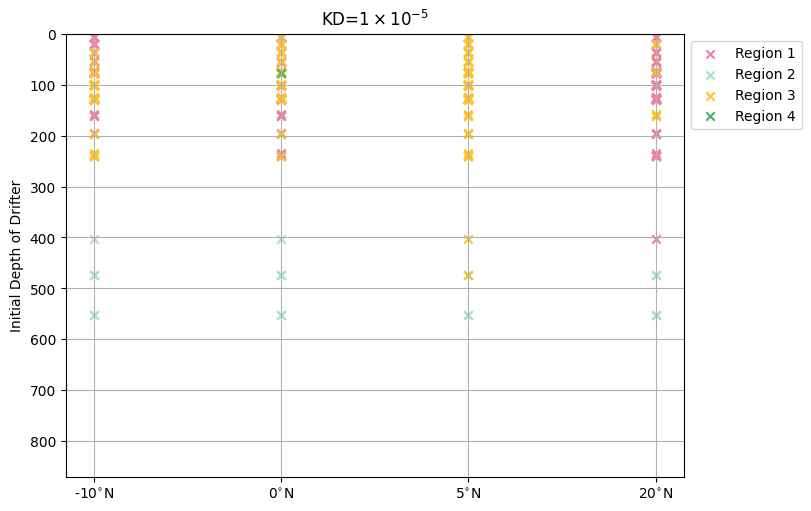

In [30]:
marker_choice = 'x'
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)
for i in range(0,4):
    m = plt.scatter(x=np.zeros(len(region1_dns[i]))+i,y=R1_init_depths[i].values,marker=marker_choice,color='#EA839B',label='Region 1')
    n = plt.scatter(x=np.zeros(len(region2_dns[i]))+i,y=R2_init_depths[i].values,marker=marker_choice,color='#ACDED5',label='Region 2')
    o = plt.scatter(x=np.zeros(len(region3_dns[i]))+i,y=R3_init_depths[i].values,marker=marker_choice,color='#FFC228',label='Region 3')
    p = plt.scatter(x=np.zeros(len(region4_dns[i]))+i,y=R4_init_depths[i].values,marker=marker_choice,color='#42B667',label='Region 4')
    
ax.grid(visible=True)
ax.set_ylim(0,870) # (100,200) (200,490) (490,600) (600,700) (700,800) (800,1280)
ax.invert_yaxis()
xlabels = ('-10$^{\circ}$N','0$^{\circ}$N','5$^{\circ}$N','20$^{\circ}$N')
ax.set_ylabel('Initial Depth of Drifter')
ax.set_xticks(np.arange(0,4,1),labels=xlabels)
ax.legend(bbox_to_anchor=(1,1),handles=[m,n,o,p])

if KD0==True:
    ax.set_title('KD=0')

if KDsb==True:
    ax.set_title('KD=$5 \\times 10^{-6}$')
    
if KD1Eminus5==True:
    ax.set_title('KD=$1 \\times 10^{-5}$')

#  <mark style="background-color: #e7cfe8"> <font color ='193551'> 4. Previous depths of particles based on current latitude and region.</font></mark>
<a name=4></a>

In [31]:
mintime_ds_10S = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_10S_SB.nc')
mintime_ds_0N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_0N_SB.nc')
mintime_ds_5N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_5N_SB.nc')
mintime_ds_10N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_10N_SB.nc')
mintime_ds_20N = xr.open_dataset(file_path+'7-23_TD_SB_reach20N_above1000m_mintime_ds_20N_SB.nc')
# mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_10N,mintime_ds_20N]
mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_20N]

mintime_ds_10S_kd = xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_10S_KD1E-5.nc')
mintime_ds_0N_kd= xr.open_dataset(file_path+'/7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_0N_KD1E-5.nc')
mintime_ds_5N_kd= xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_5N_KD1E-5.nc')
mintime_ds_10N_kd = xr.open_dataset(file_path+'/7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_10N_KD1E-5.nc')
mintime_ds_20N_kd = xr.open_dataset(file_path+'7-23_TD_KD1E-5_reach20N_above1000m_mintime_ds_20N_KD1E-5.nc')
# mintime_ds_kd_array = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_10N_kd,mintime_ds_20N_kd]
mintime_ds_kd_array = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_20N_kd]

mintime_ds_10S_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_10S_KD0.nc')
mintime_ds_0N_kd0= xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_0N_KD0.nc')
mintime_ds_5N_kd0= xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_5N_KD0.nc')
mintime_ds_10N_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_10N_KD0.nc')
mintime_ds_20N_kd0 = xr.open_dataset(file_path+'7-23_TD_KD0_reach20N_above1000m_mintime_ds_20N_KD0.nc')
# mintime_ds_kd0_array = [mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_10N_kd0,mintime_ds_20N_kd0]
mintime_ds_kd0_array = [mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_20N_kd0]

In [32]:
elim_Sv_NaN = True
if elim_Sv_NaN==True:
    msb = mintime_ds_10S.Sv
    mkd = mintime_ds_10S_kd.Sv
    m0 = mintime_ds_10S_kd0.Sv

    # get drifter numbers of where there are nans for Sv
    msbnan = msb[np.isnan(msb)]
    mkdnan = mkd[np.isnan(mkd)]
    m0nan = m0[np.isnan(m0)]


    # drifters with Sv nan values in at least one of the above datasets 
    sbUkd = np.union1d(msbnan.i.values,mkdnan.i.values)
    sbUkdU0 = np.union1d(sbUkd, m0nan.i.values)
    sbUkdU0

    # format to eliminate drifters that don't have Sv values
    for i in range(0,4):
        mintime_ds_array[i] = mintime_ds_array[i].where(~np.isin(mintime_ds_array[i].i,sbUkdU0)).dropna('i')
        mintime_ds_kd_array[i] = mintime_ds_kd_array[i].where(~np.isin(mintime_ds_kd_array[i].i,sbUkdU0)).dropna('i')
        mintime_ds_kd0_array[i] = mintime_ds_kd0_array[i].where(~np.isin(mintime_ds_kd0_array[i].i,sbUkdU0)).dropna('i')

## <font color ='193551'> Organize drifter numbers based on region and crossing latitude. </font>

In [33]:
# make region datasets for each simulation
# KD = 5E-6
# mintime_array = mintime_ds_array = [mintime_ds_10S,mintime_ds_0N,mintime_ds_5N,mintime_ds_20N]
paths = xr.open_dataset(filepath+'7-23_TD_SB_above1000m_sb.nc')

# KD = 1E-5
# mintime_kdarray = [mintime_ds_10S_kd,mintime_ds_0N_kd,mintime_ds_5N_kd,mintime_ds_20N_kd]
paths_kd = xr.open_dataset(filepath+'7-23_TD_KD1E-5_above1000m_KD1E-5.nc')

# KD = 0
# mintime_kd0array =[mintime_ds_10S_kd0,mintime_ds_0N_kd0,mintime_ds_5N_kd0,mintime_ds_20N_kd0]
paths_kd0 = xr.open_dataset(filepath+'7-23_TD_KD0_above1000m_KD0.nc')

# make region arrays where [i] is the latitude
region1_dns = [[],[],[],[]]
region2_dns = [[],[],[],[]]
region3_dns = [[],[],[],[]]
region4_dns = [[],[],[],[]]


region1_dns_kd = [[],[],[],[]]
region2_dns_kd = [[],[],[],[]]
region3_dns_kd = [[],[],[],[]]
region4_dns_kd = [[],[],[],[]]

region1_dns_kd0 = [[],[],[],[]]
region2_dns_kd0 = [[],[],[],[]]
region3_dns_kd0 = [[],[],[],[]]
region4_dns_kd0 = [[],[],[],[]]

# get the drifter numbers of each region at each latitude
for k in range(0,4): # k is the latitude
    # KD 5E-6
    region1_dns[k] = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded <= 10) & 
                                        (mintime_ds_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region2_dns[k] = mintime_ds_array[k].where((mintime_ds_array[k].depth_gridded >= 400) & 
                                        (mintime_ds_array[k].lon_gridded <=10)).dropna('i',how='all').i.values
    
    region3_dns[k] = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded > 10) & 
                                        (mintime_ds_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region4_dns[k] = mintime_ds_array[k].where((mintime_ds_array[k].lon_gridded > 10) & 
                                        (mintime_ds_array[k].depth_gridded > 400)).dropna('i',how='all').i.values
    
    # KD 1E-5
    region1_dns_kd[k] = mintime_ds_kd_array[k].where((mintime_ds_kd_array[k].lon_gridded <= 10) & 
                                        (mintime_ds_kd_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region2_dns_kd[k] = mintime_ds_kd_array[k].where((mintime_ds_kd_array[k].depth_gridded >= 400) & 
                                        (mintime_ds_kd_array[k].lon_gridded <=10)).dropna('i',how='all').i.values
    
    region3_dns_kd[k] = mintime_ds_kd_array[k].where((mintime_ds_kd_array[k].lon_gridded > 10) & 
                                        (mintime_ds_kd_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region4_dns_kd[k] = mintime_ds_kd_array[k].where((mintime_ds_kd_array[k].lon_gridded > 10) & 
                                        (mintime_ds_kd_array[k].depth_gridded > 400)).dropna('i',how='all').i.values
    
    # KD 0
    region1_dns_kd0[k] = mintime_ds_kd0_array[k].where((mintime_ds_kd0_array[k].lon_gridded <= 10) & 
                                        (mintime_ds_kd0_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region2_dns_kd0[k] = mintime_ds_kd0_array[k].where((mintime_ds_kd0_array[k].depth_gridded >= 400) & 
                                        (mintime_ds_kd0_array[k].lon_gridded <=10)).dropna('i',how='all').i.values
    
    region3_dns_kd0[k] = mintime_ds_kd0_array[k].where((mintime_ds_kd0_array[k].lon_gridded > 10) & 
                                        (mintime_ds_kd0_array[k].depth_gridded < 400)).dropna('i',how='all').i.values
    
    region4_dns_kd0[k] = mintime_ds_kd0_array[k].where((mintime_ds_kd0_array[k].lon_gridded > 10) & 
                                        (mintime_ds_kd0_array[k].depth_gridded > 400)).dropna('i',how='all').i.values

## <font color ='193551'> Choose north latitude crossing \& region and south latitude for comparison. </font>

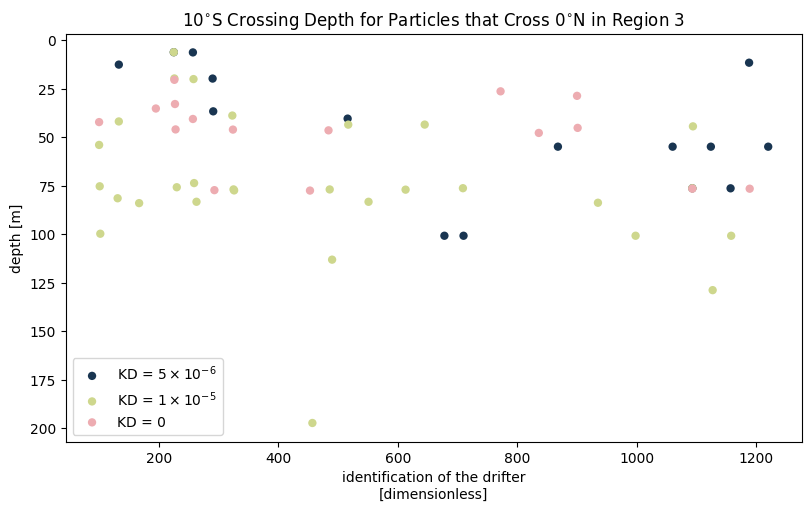

In [42]:
# choose latitude that particle crosses
lat_ind = 1
# 0 --> 10S
# 1 --> 0N
# 2 --> 5N
# 3 --> 20N

# choose region that particle crosses 
region_ind = 2
# 0 --> Region 1
# 1 --> Region 2
# 2 --> Region 3 
# 3 --> Region 4

# choose previous crossing latitude
prev_cross_lat_ind = 0
# 0 --> 10S
# 1 --> 0N
# 2 --> 5N
# 3 --> 20N

regions = [region1_dns[lat_ind],region2_dns[lat_ind],region3_dns[lat_ind],region4_dns[lat_ind]]
regionskd = [region1_dns_kd[lat_ind],region2_dns_kd[lat_ind],region3_dns_kd[lat_ind],region4_dns_kd[lat_ind]]
regionskd0 = [region1_dns_kd0[lat_ind],region2_dns_kd0[lat_ind],region3_dns_kd0[lat_ind],region4_dns_kd0[lat_ind]]


particle_cross_region = regions[region_ind]
particle_cross_regionkd = regionskd[region_ind]
particle_cross_regionkd0 = regionskd0[region_ind]

# get dataset of crossing region particles at previous crossing latitude
R_at_lat = mintime_ds_array[prev_cross_lat_ind].where(
           mintime_ds_array[prev_cross_lat_ind].drifter_num.isin(particle_cross_region)).dropna('i',how='all')
R_at_lat_kd = mintime_ds_kd_array[prev_cross_lat_ind].where(
           mintime_ds_kd_array[prev_cross_lat_ind].drifter_num.isin(particle_cross_regionkd)).dropna('i',how='all')
R_at_lat_kd0 = mintime_ds_kd0_array[prev_cross_lat_ind].where(
        mintime_ds_kd0_array[prev_cross_lat_ind].drifter_num.isin(particle_cross_regionkd0)).dropna('i',how='all')

# plot
fig,ax=plt.subplots(nrows=1,ncols=1,constrained_layout=True)
R_at_lat.plot.scatter(x='drifter_num',y='depth',
                          edgecolor='none',color='#193551',label='KD = $5 \\times 10^{-6}$')
R_at_lat_kd.plot.scatter(x='drifter_num',y='depth',
                          edgecolor='none',color='#ced78d',label='KD = $1 \\times 10^{-5}$ ')
R_at_lat_kd0.plot.scatter(x='drifter_num',y='depth',
                          edgecolor='none',color='#edacb1',label='KD = 0')
ax.invert_yaxis()

# title
lat = ['10$^{\circ}$S', '0$^{\circ}$N', '5$^{\circ}$N', '20$^{\circ}$N']
region_title = ['Region 1', 'Region 2', 'Region 3', 'Region 4']

ax.set_title(lat[prev_cross_lat_ind] + ' Crossing Depth for Particles that Cross ' + lat[lat_ind] +
             ' in ' + region_title[region_ind])
ax.legend()

In [35]:
print('avg depth KD=0' , np.round(R_at_lat_kd0.depth.mean().values, decimals=2), 'm ; ', 
        len(R_at_lat_kd0.depth), ' total particles')
print('avg depth KD=5E-6' , np.round(R_at_lat.depth.mean().values, decimals=2), 'm ; ', 
        len(R_at_lat.depth), ' total particles')
print('avg depth KD=1E-5' , np.round(R_at_lat_kd.depth.mean().values, decimals=2), 'm ; ', 
        len(R_at_lat_kd.depth), ' total particles')

avg depth KD=0 47.95 m ;  16  total particles
avg depth KD=5E-6 47.24 m ;  15  total particles
avg depth KD=1E-5 74.37 m ;  29  total particles
